In [42]:
import json
import numpy as np

firs = ""

with open('fir.json', 'r') as f:
    firs = json.load(f)

# for every entry check NAME and coordinates of FIR
for fir in firs['features']:
    name = "FIR"+fir['properties']['name']
    # extract all coordinates for
    coords = fir['geometry']['coordinates'][0]
    arr = np.array(coords)
    arr.T[[0,1]] = arr.T[[1,0]]
    c = np.round(arr.flatten(),4)
    print(' '.join(map(str,c)))
    print(name, end=' ')
    # print(np.array2string(c)[1 : -1])
    print(np.array2string(np.round(arr.flatten(),4))[1 : -1])

# print(json.dumps(firs, indent=4, sort_keys=True))

7.0 103.0 10.0 102.25 11.6481 102.9202 11.746 102.917 12.1726 102.7156 12.4061 102.7922 12.6926 102.5063 13.0167 102.5 13.2978 102.3516 13.575 102.3712 13.577 102.5676 13.7636 102.7275 14.2013 102.9613 14.2926 103.0927 14.4089 103.5327 14.3329 104.0238 14.4006 104.2057 14.3447 104.4768 14.4343 104.8053 14.336 105.2132 14.4153 105.4327 14.5528 105.5351 14.8011 105.5142 14.9984 105.5838 15.123 105.4686 15.3132 105.584 15.6578 105.6378 15.8008 105.3994 16.0132 105.414 16.1176 105.0518 16.2493 105.0124 16.5659 104.7377 17.0171 104.7333 17.254 104.8198 17.5429 104.689 17.6672 104.4669 18.1169 104.1068 18.3055 104.005 18.3445 103.7008 18.4375 103.5137 18.4357 103.3147 18.1356 103.0876 17.8716 102.6904 18.0582 102.2928 18.2197 102.0844 18.0269 101.8923 17.5957 101.267 17.4668 101.1666 17.5721 100.9601 17.8895 101.0249 18.0978 101.17 18.3423 101.18 18.4288 101.0581 18.697 101.2705 19.1282 101.2586 19.3498 101.2089 19.6028 101.2465 19.6286 100.893 19.5128 100.7566 19.5449 100.4926 19.7469 100.4

In [43]:
import rdp as RDP
import numpy as np


pos = np.array([
    [1,1], 
	[2,2],
	[3,3],
	[7,27],
	[10,10]
	])

anchors = [0, len(pos)-1]

RDP.simplify(pos, .1, anchors)

print(anchors)

[0, 2, 3, 4]


In [44]:
import rdp as RDP
import lzma
import pandas as pd
import numpy as np
from io import StringIO

n = 0
header = ""
oldId = ""
csv = ""


dfs = ""
dfs_raw = ""


with lzma.open("c:\\Users\\mschultz\\Downloads\\t_future_flas_360_ats_01.csv.xz", mode='rt', encoding='utf-8') as file:
    for line in file:
        id = line.split(sep=",")[0]
        if oldId != id:
            if(n > 1):  # ignore header
                print(header.split(sep=","))
                # print(csv)
                csvStringIO = StringIO(csv)
                df = pd.read_csv(csvStringIO, sep=",", header=None, names=header.split(sep=","))

                # create a reference set
                pos = df[['latitude','longitude']].to_numpy()
                dfs_raw = df.loc[RDP.simplify(pos, 0.00001, [0, len(pos)-1])]


                # simplify altitudes first, 25ft
                pos = df[['time','altitude']].to_numpy()
                anchors = RDP.simplify(pos, 25, anchors)  
                dfs = df.loc[anchors]

                # next step is simplify for distances, 200m
                # 0°: 1° => 111,13 km
                # 60°: 1° => 55,57 km
                # 0.003° set as equivalent for 200m
                pos = df[['latitude','longitude']].to_numpy()
                anchors = RDP.simplify(pos, .003, [0, len(pos)-1])
                dfs = df.loc[anchors]
                anchors = RDP.simplify(pos, .1, [0, len(pos)-1])

                break
            elif(n == 0):
                # add header without \\\ at the end
                header = str(line[:-1])
            csv = ""
            n += 1
        csv += str(line)

        oldId = id


['id', 'time', 'altitude', 'longitude', 'latitude']


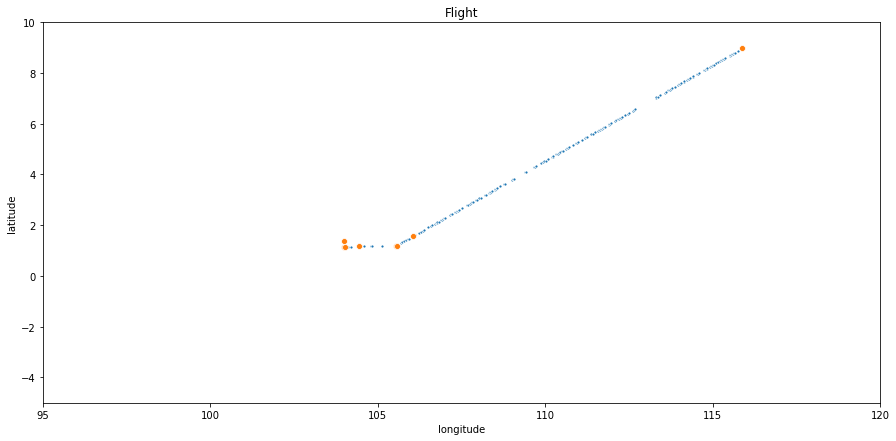

In [45]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 7))

chart = sns.lineplot(
    x="longitude",
    y="latitude",
    marker = '.',
    linestyle='',
    data=dfs_raw
).set_title('Flight')

chart = sns.lineplot(
    x="longitude",
    y="latitude",
    marker = 'o',
    linestyle='',
    data=dfs
).set_title('Flight')

plt.xlim(95,120)
plt.ylim(-5,10)

plt.show();

In [46]:
import geopandas

In [47]:
dfs

,id,time,altitude,longitude,latitude
0,SIA37A,-57081,0,-118.40778,33.94250
720,SIA37A,-56361,23475,-119.59677,34.49391
1226,SIA37A,-55855,32434,-120.78859,35.02793
1713,SIA37A,-55368,37868,-121.96664,35.53764
2206,SIA37A,-54875,40000,-123.16971,36.03983
50985,SIA37A,-6096,39982,115.88247,8.96816
56479,SIA37A,-602,39981,106.05629,1.56876
56754,SIA37A,-327,29798,105.57052,1.19662
56765,SIA37A,-316,29399,105.54830,1.18983
57357,SIA37A,276,11124,104.45457,1.16390


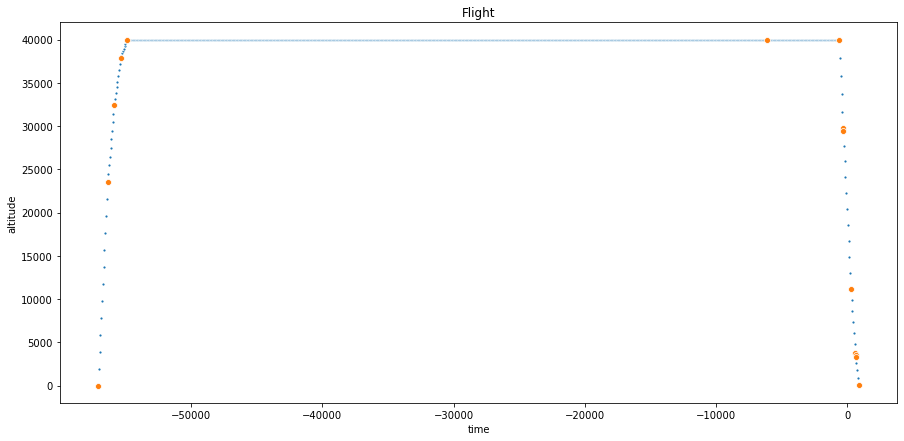

In [96]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 7))

chart = sns.lineplot(
    x="time",
    y="altitude",
    marker = '.',
    linestyle='',
    data=dr
).set_title('Flight')

chart = sns.lineplot(
    x="time",
    y="altitude",
    marker = 'o',
    linestyle='',
    data=dfs
).set_title('Flight')

# plt.xlim(95,120)
# plt.ylim(-5,10)

plt.show()

In [ ]:
dfs

# resample https://kanoki.org/2020/04/14/resample-and-interpolate-time-series-data/
# https://stackoverflow.com/questions/41854578/using-pandas-dataframe-interpolate-to-add-rows-to-dataframe#comment70893217_41854682


,id,time,altitude,longitude,latitude
0,SIA37A,-57081,0,-118.40778,33.94250
720,SIA37A,-56361,23475,-119.59677,34.49391
1226,SIA37A,-55855,32434,-120.78859,35.02793
1713,SIA37A,-55368,37868,-121.96664,35.53764
2206,SIA37A,-54875,40000,-123.16971,36.03983
50985,SIA37A,-6096,39982,115.88247,8.96816
56479,SIA37A,-602,39981,106.05629,1.56876
56754,SIA37A,-327,29798,105.57052,1.19662
56765,SIA37A,-316,29399,105.54830,1.18983
57357,SIA37A,276,11124,104.45457,1.16390


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

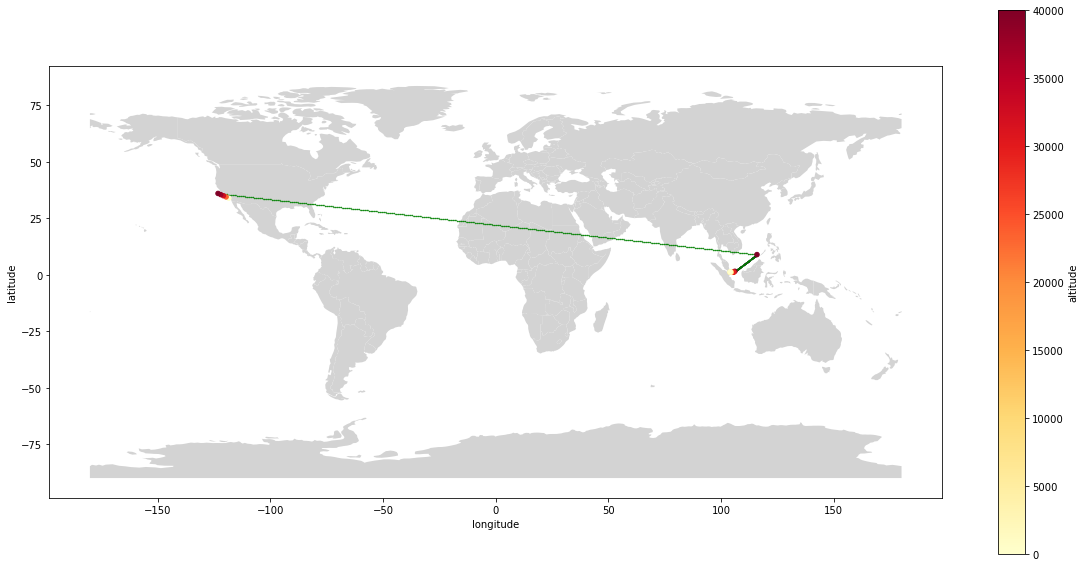

In [98]:
from itertools import count
import geopandas as gp


# initialize an axis
fig, ax = plt.subplots(figsize=(20,10))

# ax.set(xlim=(70,150), ylim=(-20, 30))
# ax.set(xlim=(90,130), ylim=(-15, 25))

countries = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)

dfs_raw.plot(x="longitude", y="latitude", kind="scatter", c = "black", s=.1, ax=ax)
dr.plot(x="longitude", y="latitude", kind="scatter", c = "green", s=.1, ax=ax)
dfs.plot(x="longitude", y="latitude", kind="scatter", c="altitude", colormap= "YlOrRd", ax=ax)



In [ ]:
# vectorized haversine function
def distance(lat1: list, lon1: list, lat2 : list = None, lon2 : list = None) -> list:

    if lat2 is None:
        # lat = lat1.shift()
        # lon = lon1.shift()
        # lat2 = lat1[1:]
        # lon2 = lon1[1:]
        # lat1 = lat
        # lon1 = lon
        lat2 = lat1
        lon2 = lon1
        lat1 = lat1.shift()
        lon1 = lon1.shift()

    # for a,b,c,d in zip(lat1, lon1, lat2, lon2):
    #     print(str(a) + "\t" + str(b) + "\t" + str(c) + "\t" + str(d))

    # to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # pre calculation
    dLat = lat2-lat1
    dLon = lon2-lon1

    # normalized distance
    a = np.sin(dLat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dLon/2.0)**2

    # first value form NAN to 0
    a[0] = 0
    earth_radius = 6371

    # calculate distance
    dist = earth_radius * 2 * np.arcsin(np.sqrt(a))

    # calculate bearing 
    x = np.sin(dLon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1) * np.cos(lat2) * np.cos(dLon))
    brng = np.arctan2(x, y)
    brng = np.rad2deg(brng)
    
    # compass_bearing
    brng = ((brng) + 360) % 360  

    # set as course, fill NAN with 0 -- last row
    brng = brng.shift(-1).fillna(0)

    return dist, brng



def sec2time(sec):
   sec = sec % (24 * 3600)
   hour = sec // 3600
   sec %= 3600
   min = sec // 60
   sec %= 60
#    print("seconds value in hours:",hour)
#    print("seconds value in minutes:",min)
   return "%02d:%02d:%02d" % (hour, min, sec) 


dff = dfs

# dff['dist'] = distance(dff['latitude'].shift(), dff['longitude'].shift(), dff.loc[1:, 'latitude'], dff.loc[1:, 'longitude'])


dff['dist'], dff['dir'] = distance(dff['latitude'], dff['longitude'])

dff['speed'] = (dff['dist']/dff['time'].diff()*1000).fillna(0)

# print(dff)

# find row which meets the criteria
f = dff[dff['time'] > 0].index[0]
# store all index in a list
indexList = dff.index.values.tolist()
# find row before -- take row 1 as minimum, since row 0 has no speed
i = max(1, indexList.index(f) - 1)
# access row and store at single list

d = dff.iloc[[i]].values.flatten().tolist()

# print(d)

# CRE acid type lat lon hdg alt spe
# CRE SIA37A A350 1.196620 105.570520 268.3 29798 247.4
dt = d[1]
print( str(sec2time(0))+">CRE", d[0], "A350 %5.6f %5.6f %5.1f %5.0f %5.1f" % (d[4], d[3], d[6], d[2], d[7]))

# https://github.com/TUDelft-CNS-ATM/bluesky/wiki/addwpt
# The speed at each waypoint is the speed for the leg towards this waypoint.
# 00:00:01.11>ADDWPT,AC0001,-3.24887465,-2.77108288,0.0,450.00000000

# all other postions are taken as waypoints
for c in range(i+1, len(indexList)):
    d = dff.iloc[[c]].values.flatten().tolist()
    print(str(sec2time(0))+">ADDWPT", d[0], "%5.6f %5.6f %5.1f %5.1f" % (d[4], d[3], d[2], d[7]))

# dff



NameError: name 'dfs' is not defined